In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'

Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_noZ\Hao_Harmony_test_no_scale.h5ad")
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
print('Original adata:', adata.shape)
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')
label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)
print('====================')
# del adata


Original adata: (161764, 33538)
all cell types: ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


## Read features k2

In [4]:
import os
# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\feature_selection_k2")
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/feature_selection_k2')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [5]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
B,11,6
CD4_T,195,84
CD8_T,23,9
DC,31,15
Mono,20,12
NK,33,17
other,5,3
other_T,69,27


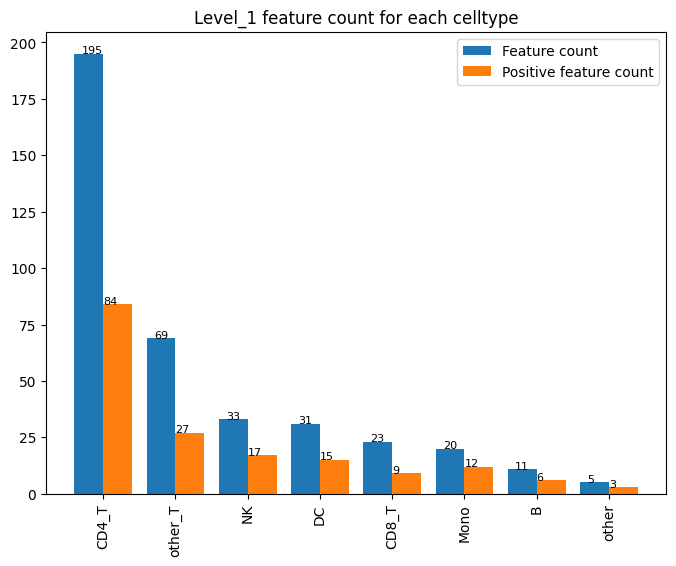

In [6]:
# Sort count_df by 'Feature_count' in descending order
count_df = count_df.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.3, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Level_1 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
counts = adata.obs['celltype.l1'].value_counts()
order = count_df.index.tolist()
counts = counts[order]
counts

celltype.l1
CD4_T      41001
other_T     6789
NK         18664
DC          3589
CD8_T      25469
Mono       49010
B          13800
other       3442
Name: count, dtype: int64

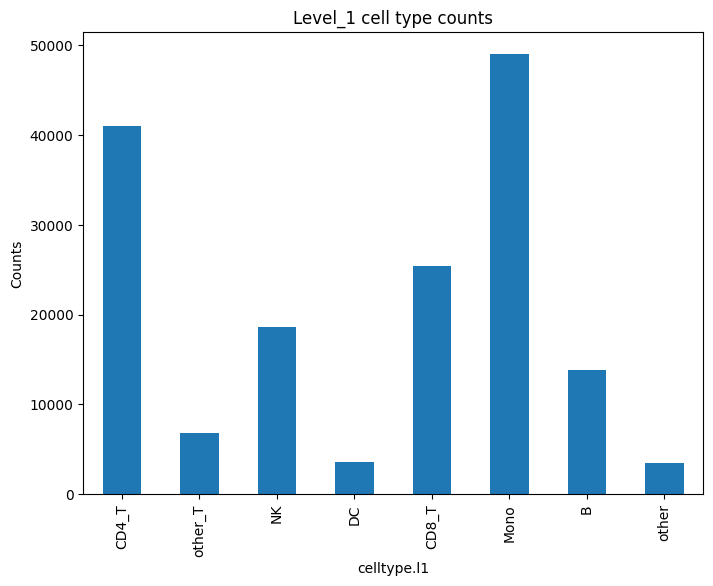

In [8]:
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Level_1 cell type counts')
plt.ylabel('Counts')
plt.show()

## Read features k3

In [9]:
import os
# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\feature_selection_k3")
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/feature_selection_k3')

features_dict_k3 = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df_k3 = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict_k3[celltype] = feature_df_k3
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [10]:
count_df_k3 = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict_k3.keys():
    feature_df_k3 = features_dict_k3[celltype]
    feature_count = feature_df_k3.shape[0]
    positive_count = feature_df_k3[feature_df_k3['Tendency'] == 1].shape[0]
    count_df_k3.loc[celltype] = [feature_count, positive_count]
count_df_k3

,Feature_count,Positive_feature_count
B,19,10
CD4_T,201,95
CD8_T,23,9
DC,50,23
Mono,50,20
NK,33,17
other,5,3
other_T,247,112


In [ ]:
count_df_k3.to_csv('count_df.csv')

In [11]:
count_df_k3.index

Index(['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T'], dtype='object')

In [12]:
counts.index

Index(['CD4_T', 'other_T', 'NK', 'DC', 'CD8_T', 'Mono', 'B', 'other'], dtype='object', name='celltype.l1')

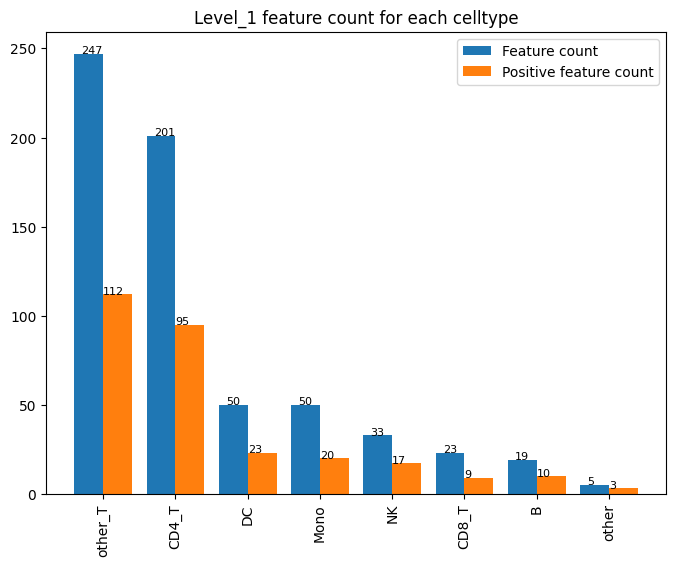

In [13]:
# Sort count_df by 'Feature_count' in descending order
count_df_k3 = count_df_k3.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(count_df_k3.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df_k3['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df_k3['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df_k3['Feature_count']):
    plt.text(i-0.3, v, str(v), fontsize=8)
for i, v in enumerate(count_df_k3['Positive_feature_count']):
    plt.text(i, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df_k3.index)
plt.xticks(rotation=90)
plt.title('Level_1 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
counts = adata.obs['celltype.l1'].value_counts()
order = count_df_k3.index.tolist()
counts = counts[order]
counts

celltype.l1
other_T     6789
CD4_T      41001
DC          3589
Mono       49010
NK         18664
CD8_T      25469
B          13800
other       3442
Name: count, dtype: int64

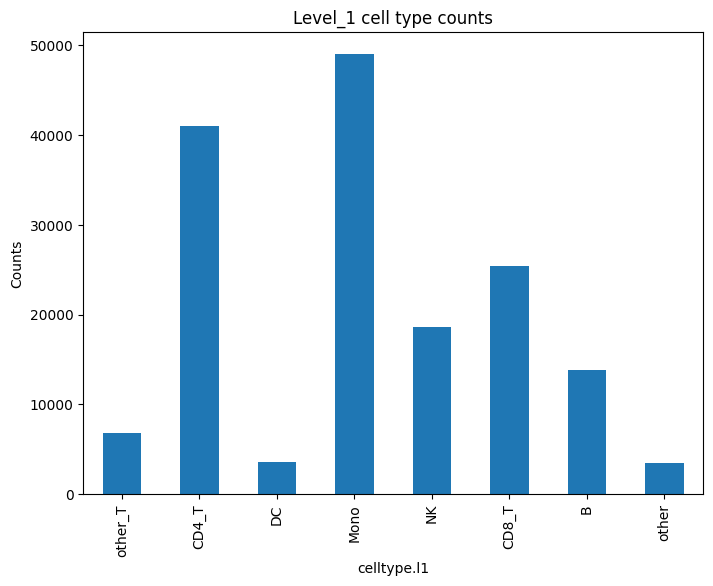

In [15]:
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Level_1 cell type counts')
plt.ylabel('Counts')
plt.show()

## Plot overlaying line chart and barplot for k3 features counts

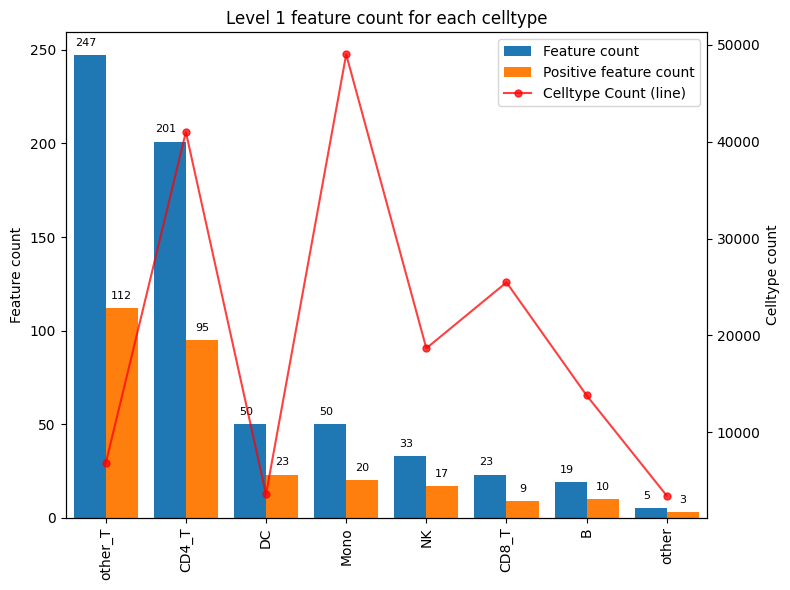

In [16]:
count_df_k3 = count_df_k3.sort_values('Feature_count', ascending=False)
# cell type counts series, align index with count_df
counts_aligned = counts.reindex(count_df_k3.index)

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))
x = np.arange(len(count_df_k3.index))
bar_width = 0.4

# ax1: Bar plot for feature counts and positive feature counts
ax1.bar(x - bar_width/2, count_df_k3['Feature_count'], bar_width, label='Feature count')
ax1.bar(x + bar_width/2, count_df_k3['Positive_feature_count'], bar_width, label='Positive feature count')
ax1.set_ylabel('Feature count')
ax1.set_xlim(-0.5, len(count_df_k3.index)-0.5)

# Add the values to each bar
for i, v in enumerate(count_df_k3['Feature_count']):
    plt.text(i-0.25, v+5, str(v), fontsize=8, ha='center')
for i, v in enumerate(count_df_k3['Positive_feature_count']):
    plt.text(i+0.2, v+5, str(v), fontsize=8, ha='center')

# Add a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(x, counts_aligned, color='red', marker='o', label='Celltype Count (line)', 
         markersize=5, alpha=0.75, linewidth=1.5)
ax2.set_ylabel('Celltype count')

# Customize x-axis and title
ax1.set_xticks(x)
ax1.set_xticklabels(count_df_k3.index, rotation=90)
ax1.set_title('Level 1 feature count for each celltype')

# Combine legends from both axes
handle, labels = ax1.get_legend_handles_labels()
handle2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handle + handle2, labels + labels2, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()